# Lab 1: Fibonacci Series
**Due Date** Wed 1/18/23 @ 8:00am
**Author** Lucien Brule <brulel@rpi.edu>

## Grading:

Python Implementation and Submission Requirements for Lab Grading
- Your code must be implemented in Python.
- To get full credit you must:
    - show your code
    - show your output
    - show your plots
- to the TA and/or the undergrad mentors.
- Make sure that your grade is recorded in the official sheet.
- The lab will be graded according to the rubric outlined on the syllabus.
- Do not submit your code via email or any other means to the TA/mentors. It will be ignored.

In [27]:
import sys
%pip install numpy matplotlib
import matplotlib.pyplot as plt
import numpy as np

Note: you may need to restart the kernel to use updated packages.


In [28]:
sys.set_int_max_str_digits(0)

## Part 1: Implementing and Comparing Recursive and Iterative Fibonacci Numbers


In [29]:
import time
import numpy as np

def time_fib(f,n):
    results = {
        "start": None,
        "end": None,
        "time": None,
        "fib": None
    }

    results["start"] = time.time()

    results["fib"] = f(n)

    results["end"] = time.time()

    results["time"] = results["end"] - results["start"]

    return results


In [30]:
def fib1(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib1(n-1) + fib1(n-2)

# call fib1
time_fib(fib1, 19)


{'start': 1674008362.834777,
 'end': 1674008362.835517,
 'time': 0.0007398128509521484,
 'fib': 4181}

In [31]:
def fib2(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    a = 0
    b = 1
    for i in range(2, n+1):
        c = a + b
        a = b
        b = c
    return c

# call fib 2
time_fib(fib2, 19)

{'start': 1674008364.1266298,
 'end': 1674008364.126635,
 'time': 5.245208740234375e-06,
 'fib': 4181}

In [32]:
# higher order function that memoizes the result of a function
def memoize(f):
    memo = {}
    def helper(x):
        if x not in memo:
            memo[x] = f(x)
        return memo[x]
    return helper

In [33]:
# memoize fib1
fib1_memo = memoize(fib1)
time_fib(fib1_memo, 19)

{'start': 1674008365.882565,
 'end': 1674008365.8833358,
 'time': 0.0007708072662353516,
 'fib': 4181}

In [34]:
# memoize fib2
fib2_memo = memoize(fib2)
time_fib(fib2_memo, 19)

{'start': 1674008366.7889469,
 'end': 1674008366.78895,
 'time': 3.0994415283203125e-06,
 'fib': 4181}

hashmaps man.. crazy.

In [35]:
known_fibs = {0: 0, 1: 1}
def fib3(n):
    if n not in known_fibs:
        known_fibs[n] = fib3(n-1) + fib3(n-2)
    return known_fibs[n]

time_fib(fib3, 19)

{'start': 1674008369.040033,
 'end': 1674008369.0400388,
 'time': 5.7220458984375e-06,
 'fib': 4181}

In [36]:
time_fib(fib3, 100)

{'start': 1674008370.124565,
 'end': 1674008370.124585,
 'time': 2.002716064453125e-05,
 'fib': 354224848179261915075}

## Part 2: Verification of Time Complexity for Iterative Fibonacci Algorithm (fib2)

method: Measuring Execution Time on Increasing Inputs

In [40]:
import json
test_cases = list(map(lambda x: 2**x,[10,12,14,16,18,19,20,21,22]))
# test_cases = list(map(lambda x: 2**x,[1,2,3,4,5,6]))

print(json.dumps(test_cases))

[1024, 4096, 16384, 65536, 262144, 524288, 1048576, 2097152, 4194304]


## Time the results

This took approximately 4m30s on a M1 Pro

In [41]:
time_results = []
for n in test_cases:
    print("n: ", n)
    # print("fib1: ", time_fib(fib1, n, False))
    # print("fib2: ", time_fib(fib2, n, False))
    # print("fib1_memo: ", time_fib(fib1_memo, n, False))
    # print("fib2_memo: ", time_fib(fib2_memo, n, False))
    time_results.append(time_fib(fib2_memo,n))

    # print("fib3: ", time_fib(fib3, n, False))

n:  1024
n:  4096
n:  16384
n:  65536
n:  262144
n:  524288
n:  1048576
n:  2097152
n:  4194304


/var/folders/0v/5jh16t7j7_zfd7pcz8cs7tjc0000gn/T/ipykernel_3349/1467361369.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='#666666', linestyle='-')


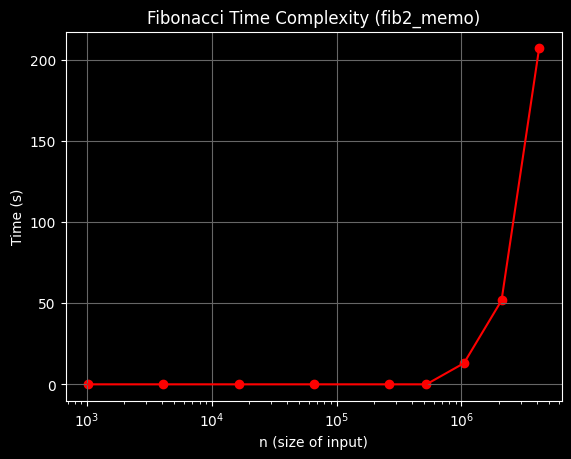

In [64]:
# graph the results, x-axis is n, y-axis is time
plt.style.use('dark_background')

fig, ax = plt.subplots()
ax.set_xticks(test_cases)
ax.set_xticklabels(test_cases)
ax.set_xscale('log')
# draw dots on the graph for each test case
plt.scatter(test_cases, list(map(lambda x: x["time"], time_results)), color='red')


# Show grid lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')



plt.xlabel('n (size of input)')
plt.ylabel('Time (s)')
# dark background
plt.title('Fibonacci Time Complexity (fib2_memo)')
plt.plot(test_cases, list(map(lambda x: x["time"], time_results)),color='red')

In [65]:
time_results = []
test_cases = list(map(lambda x: 2**x,[1, 5, 10, 15, 20, 25, 30, 35, 40, 41, 42, 43]))

for n in test_cases:
    print("n: ", n)
    time_results.append(time_fib(fib1_memo,n))





n:  2
n:  32
n:  1024


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()
ax.set_xticks(test_cases)
ax.set_xticklabels(test_cases)
ax.set_xscale('log')
# draw dots on the graph for each test case
plt.scatter(test_cases, list(map(lambda x: x["time"], time_results)), color='red')


# Show grid lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')



plt.xlabel('n (size of input)')
plt.ylabel('Time (s)')
# dark background
plt.title('Fibonacci Time Complexity (fib2_memo)')
plt.plot(test_cases, list(map(lambda x: x["time"], time_results)),color='red')